#  F2: Schwefel’s Problem

Minimum at -450

Unimodal

In [324]:
import sys
sys.path.append('../')
from functions import *
from PSO import *
import numpy as np
import matplotlib.pyplot as plt

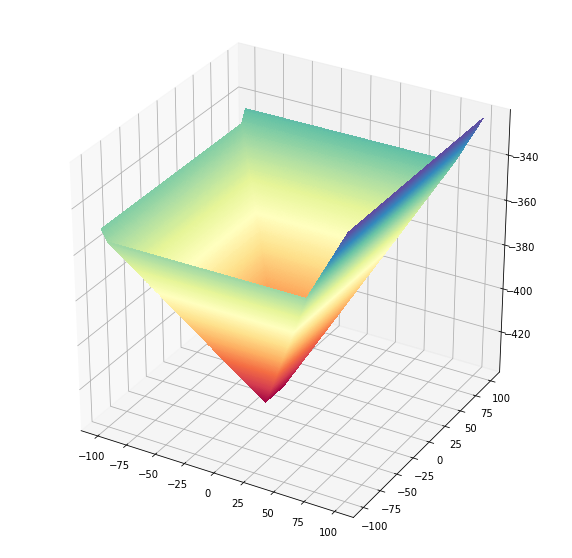

In [2]:
plot_fct(Schwefel_Problem)

In [325]:
class F2_Schwefel_Problem:
    
    nbFitness = 0
    
    def __init__(self, dim, bounds):
        self.dim = dim
        self.bounds=bounds
        F2_Schwefel_Problem.nbFitness = 0

    def fitness(self, x):
        F = abs(x[0])
        for i in range(0,x.shape[0]):
            z = x[i] - schwefel[i]
            F = np.maximum(F , abs(z))
        F2_Schwefel_Problem.nbFitness += 1
        return F + f_bias[1]

## Algorithm choice

Self implementation of the Inertia weight PSO.

## Parameter choices

### Number of particules

The particules browse the search space. The bigger the search space is, the more we need particules for exploration (diversification).

For the dimension 50, we take 20 particules. 

For the dimention 500, we take 50 particules.

### Inertia factor

The inertia factors allows controling the velocity. 

### Self confidence 

The self confidence allows to take into account the best solution of the particule. 


### Swarm confidence 

The self confidence allows to take into account the best solution of the swarm.


As the function is unimodal, we want to exploit more than we explore. 

We will then set c2, the Swarm confidence,  greater than C1, Self confidence .

### Stopping criterion

The algorithm stops when the fitness value has almost not changed over the last N generations. We expect here to have a better final distance when N is big. For computational time reason, we will stop the algorithm if the fitness value has not decreased more than 0.01 over the last 20 iterations.

## Dimension 50

Best result -360.4877311826879
Best solution [-35.84825836  37.68609801  32.68605462 -24.90594027 -34.59836737
 -92.85709453  21.59086868 -11.14834885 -10.09819919 -17.6241474
  -3.97205924  35.69017201  44.83988402 -22.18185421 -35.57245936
  -9.4295834  -40.44706876  28.07708716 -13.32283036  12.81265972
  15.66824602  10.57033837  10.48354902 -22.43419234  24.020167
  57.48313849 -48.31441377   8.90636313 -68.31388094 -11.02042417
 -47.89845525  17.38245614  20.54735325 -25.79506769 -56.65570279
  -0.51950693 -23.54335264  -1.24006705 -60.96988098  26.30285691
  22.60412141  -0.44268692  42.38127315 -12.81448627 -13.83976723
 -50.41194159 -36.13587755  18.7789017  -21.78959749 -36.68681428]
The number of function evaluations 3240
The computational time 0.3229029178619385


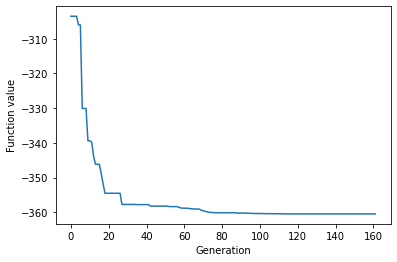

In [322]:
problem=F2_Schwefel_Problem(50, [-100,100])
swarm=Swarm(problem, numOfParticule=20, w=0.729, c1=2.50, c2=1.50)
optimize = Optimize(swarm, epsilon=0.01, N=20)
res = optimize.run()
print ('Best result ' + str(res[0][-1]))
print ('Best solution ' + str(swarm.best_swarm_position ))
print ('The number of function evaluations ' + str(res[1]))
print ('The computational time ' + str(res[2]))
plt.plot(res[0])
plt.ylabel('Function value')
plt.xlabel('Generation')
plt.show()


## Dimension 500

Best result -330.69598459214467
Best solution [-3.28843412e+01  3.63670755e+01  7.29195842e+00 -2.50436986e+01
  7.28349968e+00  2.97174015e+00  9.19766446e-01 -4.56443117e+01
  1.20408793e+01 -2.94032817e+00 -1.19363250e+01 -4.39494687e+01
  2.50483039e+01 -1.36630371e+01  3.20155336e+00 -2.32868075e+01
 -4.26017963e+01  9.00646808e+00 -9.59085560e+00  1.88695067e+01
  4.75610358e+00 -9.89008474e+00  2.13661923e+00 -2.58503893e+01
 -2.25788662e+01  2.59348291e+01  6.82179610e+00 -1.37796511e+00
 -1.94829736e+01  4.26859561e+00  4.38533814e+01  2.57348296e+01
 -4.66893734e+01 -2.45844507e+01  2.24886509e+01  1.12563464e+01
 -2.77123707e+01  2.18326256e+01  1.01610008e+01  1.36118800e+01
  3.58188173e+00 -5.16651640e+01 -7.61453516e+00  1.42276054e+01
 -9.95368212e+00  9.48496324e+00  7.26897403e+00  3.10134475e+01
 -2.27190345e+01  9.83474609e+00  4.88650359e+01  5.11333752e+01
  6.28627029e+01  1.83210345e+01 -1.42088821e+00 -8.31997273e+01
 -7.41054720e+00 -1.54159965e+00 -1.24732355

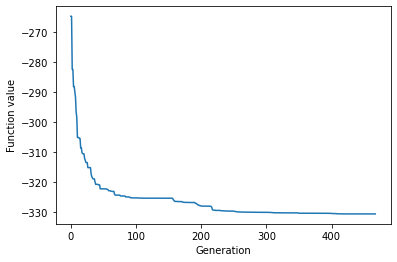

In [323]:
problem=F2_Schwefel_Problem(500, [-100,100])
swarm=Swarm(problem, numOfParticule=50, w=0.729, c1=2.50, c2=1.50)
optimize = Optimize(swarm, epsilon=0.01, N=20)
res = optimize.run()
print ('Best result ' + str(res[0][-1]))
print ('Best solution ' + str(swarm.best_swarm_position ))
print ('The number of function evaluations ' + str(res[1]))
print ('The computational time ' + str(res[2]))
plt.plot(res[0])
plt.ylabel('Function value')
plt.xlabel('Generation')
plt.show()


## Conclusion:

The global minimum is not reached, the algorithm seems to be stucked in local minimums.

